In [4]:
pip install psycopg2-binary

  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/7a/1f/a6cf0cdf944253f7c45d90fbc876cc8bed5cc9942349306245715c0d88d6/psycopg2_binary-2.9.9-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/ba/ebe5599acf47371393191091ae95fca08eb6f12fd151b52c8dbebb990d25/fonttools-4.43.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 8.4 MB/s eta 0:00:00
  Obtaining dependency informati

In [39]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import numpy as np


In [51]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="ksk4532",
                                  password="test",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [3]:
deptinfo = pd.read_csv("deptinfo.csv", header = None)
deptinfo = deptinfo[[0, 1]]
deptinfo = deptinfo.rename(columns = {0: "DEPT", 1: "DEPTDESC"})
deptinfo

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN
5,1301,BE2
6,1704,R LAUREN
7,1905,R & Y
8,2102,CAB
9,2105,R TAYLOR


In [4]:
skstinfo = pd.read_csv("skstinfo.csv", header = None)
skstinfo = skstinfo[[0, 1, 2, 3]]
skstinfo = skstinfo.rename(columns = {0: "SKU", 1: "STORE", 2: "COST", 3: "RETAIL"})
skstinfo

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.00
1,3,103,123.36,440.00
2,3,104,123.36,440.00
3,3,202,123.36,440.00
4,3,203,123.36,440.00
...,...,...,...,...
39230141,9999997,2007,15.00,19.50
39230142,9999997,2707,15.00,9.75
39230143,9999997,3307,15.00,19.50
39230144,9999997,7507,15.00,19.50


In [29]:
skstinfo.shape

(39230146, 4)

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
skstinfo.describe()

,SKU,STORE,COST,RETAIL
count,39230146.00,39230146.00,39230146.00,39230146.00
mean,4964063.22,4506.67,24.16,43.33
std,2871948.38,2803.19,40.57,83.92
min,3.00,100.00,0.00,0.00
25%,2500002.00,2203.00,9.00,12.99
50%,4921672.00,4207.00,15.36,24.50
75%,7441916.00,7007.00,26.76,45.00
max,9999997.00,9909.00,2700.00,6017.00


In [13]:
skstinfo.isnull().sum()

SKU       0
STORE     0
COST      0
RETAIL    0
dtype: int64

In [42]:
skstinfo["SKU"].value_counts()

SKU
6549436    354
4079531    354
579292     353
3097865    352
2289007    352
          ... 
3397384      1
3397396      1
4892185      1
8568412      1
3617133      1
Name: count, Length: 760212, dtype: int64

In [43]:
skstinfo["STORE"].value_counts()

STORE
2203    216061
8402    208661
9103    193535
209     192625
1709    188777
         ...  
300         14
400         14
500         14
5703         8
6803         4
Name: count, Length: 357, dtype: int64

In [22]:
skstinfo[skstinfo["COST"] == 0]["SKU"].nunique()

3423

In [26]:
skstinfo[skstinfo["COST"] == 0]["RETAIL"].value_counts()

RETAIL
0.00      350340
0.01         419
0.25          70
15.00         67
14.99         57
           ...  
165.00         1
25.00          1
4.87           1
2.25           1
4.50           1
Name: count, Length: 100, dtype: int64

There are no null values, but there are 3423 SKU with COST equals to 0, but RETAIL not necessarily 0. 

In [41]:
np.corrcoef(skstinfo["COST"], skstinfo["RETAIL"])

array([[1.        , 0.89551082],
       [0.89551082, 1.        ]])

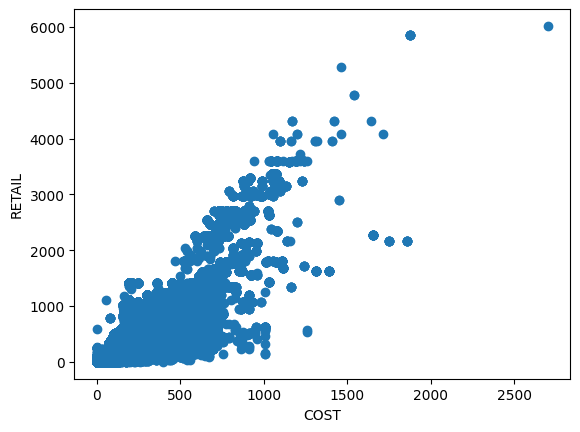

In [49]:
plt.scatter(skstinfo["COST"], skstinfo["RETAIL"])
plt.xlabel("COST")
plt.ylabel("RETAIL");

In [44]:
skstinfo["DIFF"] = skstinfo["RETAIL"] - skstinfo["COST"]
skstinfo

,SKU,STORE,COST,RETAIL,DIFF
0,3,102,123.36,440.00,316.64
1,3,103,123.36,440.00,316.64
2,3,104,123.36,440.00,316.64
3,3,202,123.36,440.00,316.64
4,3,203,123.36,440.00,316.64
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,4.50
39230142,9999997,2707,15.00,9.75,-5.25
39230143,9999997,3307,15.00,19.50,4.50
39230144,9999997,7507,15.00,19.50,4.50


In [46]:
skstinfo["DIFF"].describe()

count   39230146.00
mean          19.17
std           50.91
min         -864.18
25%            1.10
50%            9.75
75%           25.00
max         3977.46
Name: DIFF, dtype: float64

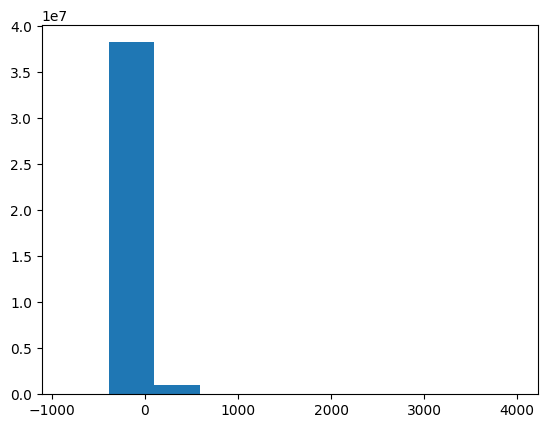

In [48]:
plt.hist(skstinfo["DIFF"]);

In [50]:
skuinfo = pd.read_csv("skuinfo.csv", header = None, 
                      names = ["SKU", "DEPT", "CLASSID", "UPC", "STYLE", "COLOR", "SIZE", "PACKSIZE", "VENDOR", "BRAND", 1, 2, 3])
skuinfo

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_95650/2857958721.py:1: DtypeWarning: Columns (7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  skuinfo = pd.read_csv("skuinfo.csv", header = None,


,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,1,2,3
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,NaN,NaN
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR,0,NaN,NaN
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE,0,NaN,NaN
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI,0,NaN,NaN
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564173,9999973,3103,009,400009973999,702 S3JAYV,STONE,4,1,6813115,POLO JEA,0,NaN,NaN
1564174,9999974,9801,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,0,NaN,NaN
1564175,9999991,2301,004,400009991999,026 MDU201,618RED ROSE,8,1,0023272,JONES/LA,0,NaN,NaN
1564176,9999992,1202,402,400009992999,14 F52UN1,PALE JADE,L,1,1446212,CABERNET,0,NaN,NaN


In [51]:
df = pd.read_csv("skuinfo.csv", sep = "delimiter", header = None)
df 

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_95650/1413031463.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("skuinfo.csv", sep = "delimiter", header = None)


,0
0,"3,6505,113,000400000003000,00 F55KT2,WHISPE..."
1,"4,8101,002,000400000004000,22 615CZ4,SPEARM..."
2,"5,7307,003,000400000005000,7LBS 245-01,34 SIL..."
3,"8,3404,00B,000400000008000,622 F05H84,MORNIN..."
4,"15,2301,004,000400000015000,126 MDU461,255CA..."
...,...
1564173,"9999973,3103,009,000400009973999,702 S3JAYV,..."
1564174,"9999974,9801,726,000400009974999, G50171,..."
1564175,"9999991,2301,004,000400009991999,026 MDU201,..."
1564176,"9999992,1202,402,000400009992999,14 F52UN1,..."


In [52]:
drops = []

for i, v in enumerate(df[0]):
    if df.iloc[i, 0].count(',') > 10:
        drops.append(i)
        
len(drops)

8148

Since the number of rows with extra column is relatively small compared with total number of rows, it is reasonable to drop these.

In [53]:
skuinfo = skuinfo.drop(drops)
columns_to_select = skuinfo.columns[:-3]
skuinfo = skuinfo[columns_to_select]
skuinfo

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA
...,...,...,...,...,...,...,...,...,...,...
1564173,9999973,3103,009,400009973999,702 S3JAYV,STONE,4,1,6813115,POLO JEA
1564174,9999974,9801,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN
1564175,9999991,2301,004,400009991999,026 MDU201,618RED ROSE,8,1,0023272,JONES/LA
1564176,9999992,1202,402,400009992999,14 F52UN1,PALE JADE,L,1,1446212,CABERNET


In [61]:
skuinfo.shape

(1556030, 10)

In [64]:
skuinfo.isnull().sum()

SKU         0
DEPT        0
CLASSID     0
UPC         0
STYLE       0
COLOR       0
SIZE        0
PACKSIZE    0
VENDOR      0
BRAND       0
dtype: int64

In [62]:
skuinfo.describe()

,SKU,DEPT,UPC
count,1556030.00,1556030.00,1556030.00
mean,4997540.76,5268.43,400004806033.48
std,2883041.11,2177.37,3250350.63
min,3.00,800.00,400000000612.00
25%,2507064.75,3701.00,400001729407.25
50%,4992139.00,5301.00,400004298208.00
75%,7500426.50,7102.00,400007874532.75
max,9999997.00,9801.00,400009999998.00


In [63]:
skuinfo["COLOR"].value_counts()

COLOR
BLACK           98933
WHITE           42664
NAVY            30521
RED             22840
MULTI           20538
                ...  
2451002A            1
LOVE FILLS          1
SILV/TURQ           1
420LIGHTBL          1
10BERRY             1
Name: count, Length: 71323, dtype: int64

In [65]:
skuinfo["SIZE"].value_counts()

SIZE
L             124554
M             124347
S             107074
ALL           102739
XL             89543
               ...  
GW PASTA           1
AR-181H            1
P/P HYPER          1
COSMIC             1
LOT SAMPLE         1
Name: count, Length: 9785, dtype: int64

In [66]:
skuinfo["BRAND"].value_counts()

BRAND
POLO FAS     130994
BROWN SH      52160
ENZO ANG      49121
LIZ CLAI      43723
ROUNDTRE      39466
              ...  
HEARTLAN          1
SARIN IM          1
J.LO              1
GLOW MIA          1
MY THREE          1
Name: count, Length: 1925, dtype: int64

To use these columns, more cleaning is needed.

In [55]:
strinfo = pd.read_csv("strinfo.csv", header = None, index_col = False, names = ["STORE", "CITY", "STATE", "ZIP"])
strinfo

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_95650/2212743107.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  strinfo = pd.read_csv("strinfo.csv", header = None, index_col = False, names = ["STORE", "CITY", "STATE", "ZIP"])


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


In [68]:
strinfo.shape

(453, 4)

In [67]:
strinfo.isnull().sum()

STORE    0
CITY     0
STATE    0
ZIP      0
dtype: int64

In [56]:
strinfo["STATE"].value_counts()

STATE
TX    79
FL    48
AR    27
AZ    26
OH    25
NC    24
LA    22
MO    20
TN    19
GA    16
OK    15
KS    15
CO    14
KY    14
AL    13
VA    10
CA     8
SC     8
MS     7
UT     6
NM     6
IA     5
NV     5
NE     4
MT     3
NJ     3
ID     3
IL     3
NY     2
IN     2
WY     1
Name: count, dtype: int64